In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax

#model = AutoModelForSequenceClassification.from_pretrained("Kaludi/Reviews-Sentiment-Analysis")

#tokenizer = AutoTokenizer.from_pretrained("Kaludi/Reviews-Sentiment-Analysis")

#inputs = tokenizer("I don't feel like you trust me to do my job.", return_tensors="pt")

#outputs = model(**inputs)
#scores_ = outputs[0][0].detach().numpy()
#scores_ = softmax(scores_)

# Format output dict of scores
#labels = ["Negative", "Positive"]
#scores = {l:float(s) for (l,s) in zip(labels, scores_) }



rev_apple = pd.read_csv("https://raw.githubusercontent.com/HaoEarm/DSA3101_Project/main/Data/Revolut_apple.csv")
rev_play = pd.read_csv("https://raw.githubusercontent.com/HaoEarm/DSA3101_Project/main/Data/revolut_play_df.csv")
rev_all = pd.concat([rev_apple, rev_play], ignore_index= True)
rev_all = rev_all.drop(columns=['Unnamed: 0'])
rev_all['No.'] = rev_all.reset_index().index



#model = AutoModelForSequenceClassification.from_pretrained("Kaludi/Reviews-Sentiment-Analysis")
#tokenizer = AutoTokenizer.from_pretrained("Kaludi/Reviews-Sentiment-Analysis")
#inputs = tokenizer(rev_all['Review'][0],padding=True,return_tensors="pt")
#outputs = model(**inputs)
#scores_ = outputs[0][0].detach().numpy()
#scores_ = softmax(scores_)

# Format output dict of scores
#labels = ["Negative", "Positive"]
#scores = {l:float(s) for (l,s) in zip(labels, scores_) }

all_s = []
model = AutoModelForSequenceClassification.from_pretrained("Kaludi/Reviews-Sentiment-Analysis")
tokenizer = AutoTokenizer.from_pretrained("Kaludi/Reviews-Sentiment-Analysis")
for i in range(len(rev_all['Review'])):
    inputs = tokenizer(rev_all['Review'][i],padding=True,return_tensors="pt")
    outputs = model(**inputs)
    scores_ = outputs[0][0].detach().numpy()
    scores_ = softmax(scores_)

# Format output dict of scores
    labels = ["Negative", "Positive"]
    scores = {l:float(s) for (l,s) in zip(labels, scores_) }
    all_s.append(scores)


pytorch_model.bin:   0%|          | 0.00/738M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [6]:
# Graphs
positive_values = [d['Positive'] for d in all_s]
negative_values = [d['Negative'] for d in all_s]
rev_all['Positive'] = positive_values
rev_all['Negative'] = negative_values

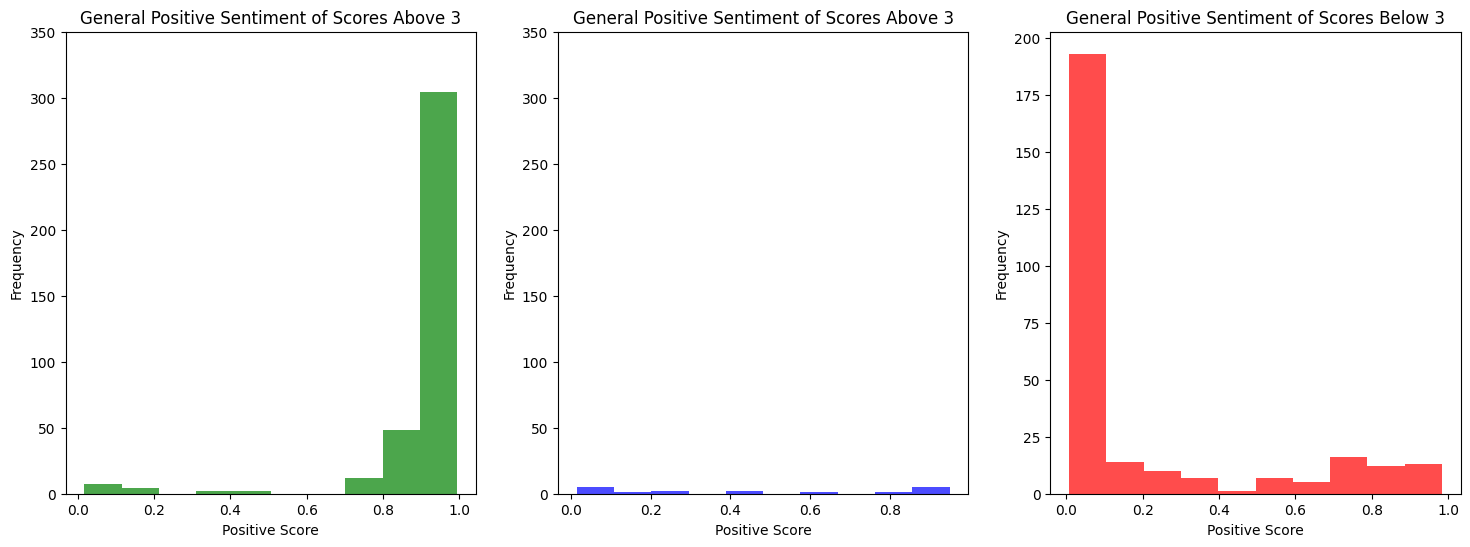

In [25]:
import matplotlib.pyplot as plt

# Filter the DataFrame
filtered_positive_df = rev_all[rev_all['Score'] > 3]
filtered_neutral_df = rev_all[rev_all['Score'] == 3]
filtered_negative_df = rev_all[rev_all['Score'] < 3]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot positive scores histogram
ax1.hist(filtered_positive_df['Positive'], bins=10, color='green', alpha=0.7)
ax1.set_xlabel('Positive Score')
ax1.set_ylabel('Frequency')
ax1.set_title('General Positive Sentiment of Scores Above 3')
ax1.set_ylim(0, 350)

# Plot neutral scores histogram
ax2.hist(filtered_neutral_df['Positive'], bins=10, color='blue', alpha=0.7)
ax2.set_xlabel('Positive Score')
ax2.set_ylabel('Frequency')
ax2.set_title('General Positive Sentiment of Scores Above 3')
ax2.set_ylim(0, 350)

# Plot negative scores histogram
ax3.hist(filtered_negative_df['Positive'], bins=10, color='red', alpha=0.7)
ax3.set_xlabel('Positive Score')
ax3.set_ylabel('Frequency')
ax3.set_title('General Positive Sentiment of Scores Below 3')
ax2.set_ylim(0, 350)

# Show the plot
plt.show()


In [21]:
# Analysis on neutral scores
filtered_neutral_df = rev_all[rev_all['Score'] == 3]
filtered_neutral_df = filtered_neutral_df[filtered_neutral_df['Positive'] > 0.6]
for x in filtered_neutral_df['Review']:
  print(x)

I’m having trouble opening the app as it keeps prompting me to update to latest version, which I have done - there is no update option available in App Store. How do I overcome the issue and gain access to my account?
Need to set up again every time.
I made a 2 transfers 2 days ago and Revolut emailed saying transaction completed but my bank did not receive the funds , even though account details are correct. Who can I check with in Revolut to resolve this?
Good app but they don't give loan or credit to existing users unfortunately
I don't know why but I keep getting pop ups for Revolut not responding
Doesn't work on some machines especially in Tescos
Working fine. Nice look and feel


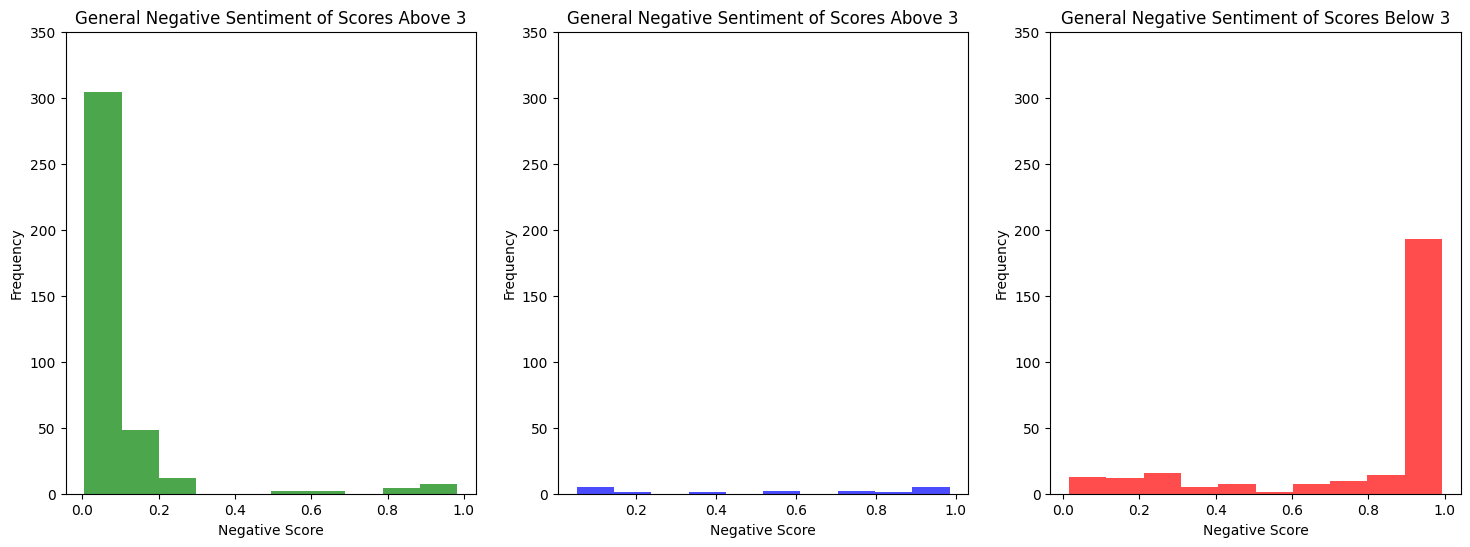

In [26]:
# Filter the DataFrame
filtered_positive_df = rev_all[rev_all['Score'] > 3]
filtered_neutral_df = rev_all[rev_all['Score'] == 3]
filtered_negative_df = rev_all[rev_all['Score'] < 3]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot positive scores histogram
ax1.hist(filtered_positive_df['Negative'], bins=10, color='green', alpha=0.7)
ax1.set_xlabel('Negative Score')
ax1.set_ylabel('Frequency')
ax1.set_title('General Negative Sentiment of Scores Above 3')
ax1.set_ylim(0, 350)

# Plot neutral scores histogram
ax2.hist(filtered_neutral_df['Negative'], bins=10, color='blue', alpha=0.7)
ax2.set_xlabel('Negative Score')
ax2.set_ylabel('Frequency')
ax2.set_title('General Negative Sentiment of Scores Above 3')
ax2.set_ylim(0, 350)

# Plot negative scores histogram
ax3.hist(filtered_negative_df['Negative'], bins=10, color='red', alpha=0.7)
ax3.set_xlabel('Negative Score')
ax3.set_ylabel('Frequency')
ax3.set_title('General Negative Sentiment of Scores Below 3')
ax3.set_ylim(0, 350)

# Show the plot
plt.show()